# Decision Tree
-----
**Definition**
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

------

**Mathematical formulation**
- Given training vectors$x_i \in R^n$, i=1,…, l and a label vector $y\in R^l$,a decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together.
- Let the data at node $m$ be represented by $Q_m$ with $N_m$ samples. For each candidate split $\theta = (j, t_m)$ consisting of a feature $j$ and threshold $t_m$,  partition the data into $Q_m^{left}(\theta)$ and $Q_m^{right}(\theta)$ subsets
\begin{align}\begin{aligned}Q_m^{left}(\theta) = \{(x, y) | x_j <= t_m\}\\Q_m^{right}(\theta) = Q_m \setminus Q_m^{left}(\theta)\end{aligned}\end{align}
- The quality of a candidate split of node $m$ is then computed using an impurity function or loss function $H()$, the choice of which depends on the task being solved (classification or regression)
<br>\begin{align}\begin{aligned}G(Q_m, \theta) = \frac{N_m^{left}}{N_m} H(Q_m^{left}(\theta))+ \frac{N_m^{right}}{N_m} H(Q_m^{right}(\theta))\end{aligned}\end{align}
- Select the parameters that minimises the impurity
\\begin{align}\begin{aligned}theta^* = \operatorname{argmin}_\theta  G(Q_m, \theta)\end{aligned}\end{align}
- Recurse for subsets $Q_m^{left}(\theta^*)$ and $Q_m^{right}(\theta^*)$ until the maximum allowable depth is reached, $N_m < \min_{samples}$ or $N_m = 1$


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read and Check Data

In [3]:
Data=pd.read_csv('diabetes.csv')

In [4]:
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


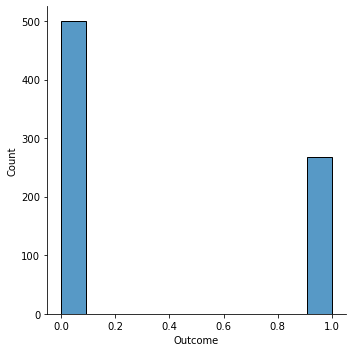

In [5]:
sns.displot(Data.Outcome)

In [8]:
#check data
for i in Data.columns:
    missing_data=Data[i].isnull().sum()
    percent_missing=(missing_data/len(Data))*100
    print(i+' missing:',missing_data,"values",",percent", percent_missing)

Pregnancies missing: 0 values ,percent 0.0
Glucose missing: 0 values ,percent 0.0
BloodPressure missing: 0 values ,percent 0.0
SkinThickness missing: 0 values ,percent 0.0
Insulin missing: 0 values ,percent 0.0
BMI missing: 0 values ,percent 0.0
DiabetesPedigreeFunction missing: 0 values ,percent 0.0
Age missing: 0 values ,percent 0.0
Outcome missing: 0 values ,percent 0.0


## Get data prepared

In [9]:
X=np.array(Data.iloc[:,:8]).reshape(-1,8)
Y=np.array(Data.iloc[:,-1]).reshape(-1,1)
print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


In [10]:
from sklearn.model_selection import train_test_split #split date into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [11]:
from sklearn.preprocessing import StandardScaler # Scale the data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Begin to classify

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.7317669172932331), (4, 0.7239576213260424), (5, 0.7383287764866713), (6, 0.7212576896787424), (7, 0.7147641831852358), (8, 0.7147983595352017), (9, 0.7031442241968557), (10, 0.7108680792891319), (11, 0.6978981544771019), (12, 0.7134825700615174), (13, 0.7043916609706085), (14, 0.7043916609706085), (15, 0.7004784688995216), (16, 0.7043574846206425), (17, 0.7161312371838687), (18, 0.7135167464114833), (19, 0.7095352016404648)]


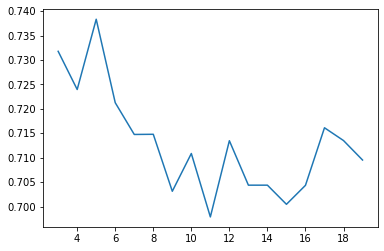

In [14]:
plt.plot(*zip(*depth))
plt.show()

## Find the best depth

In [15]:
from sklearn.model_selection import  GridSearchCV
parameters={'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X, y=Y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7487734487734488 {'max_depth': 5}


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Visualize the result

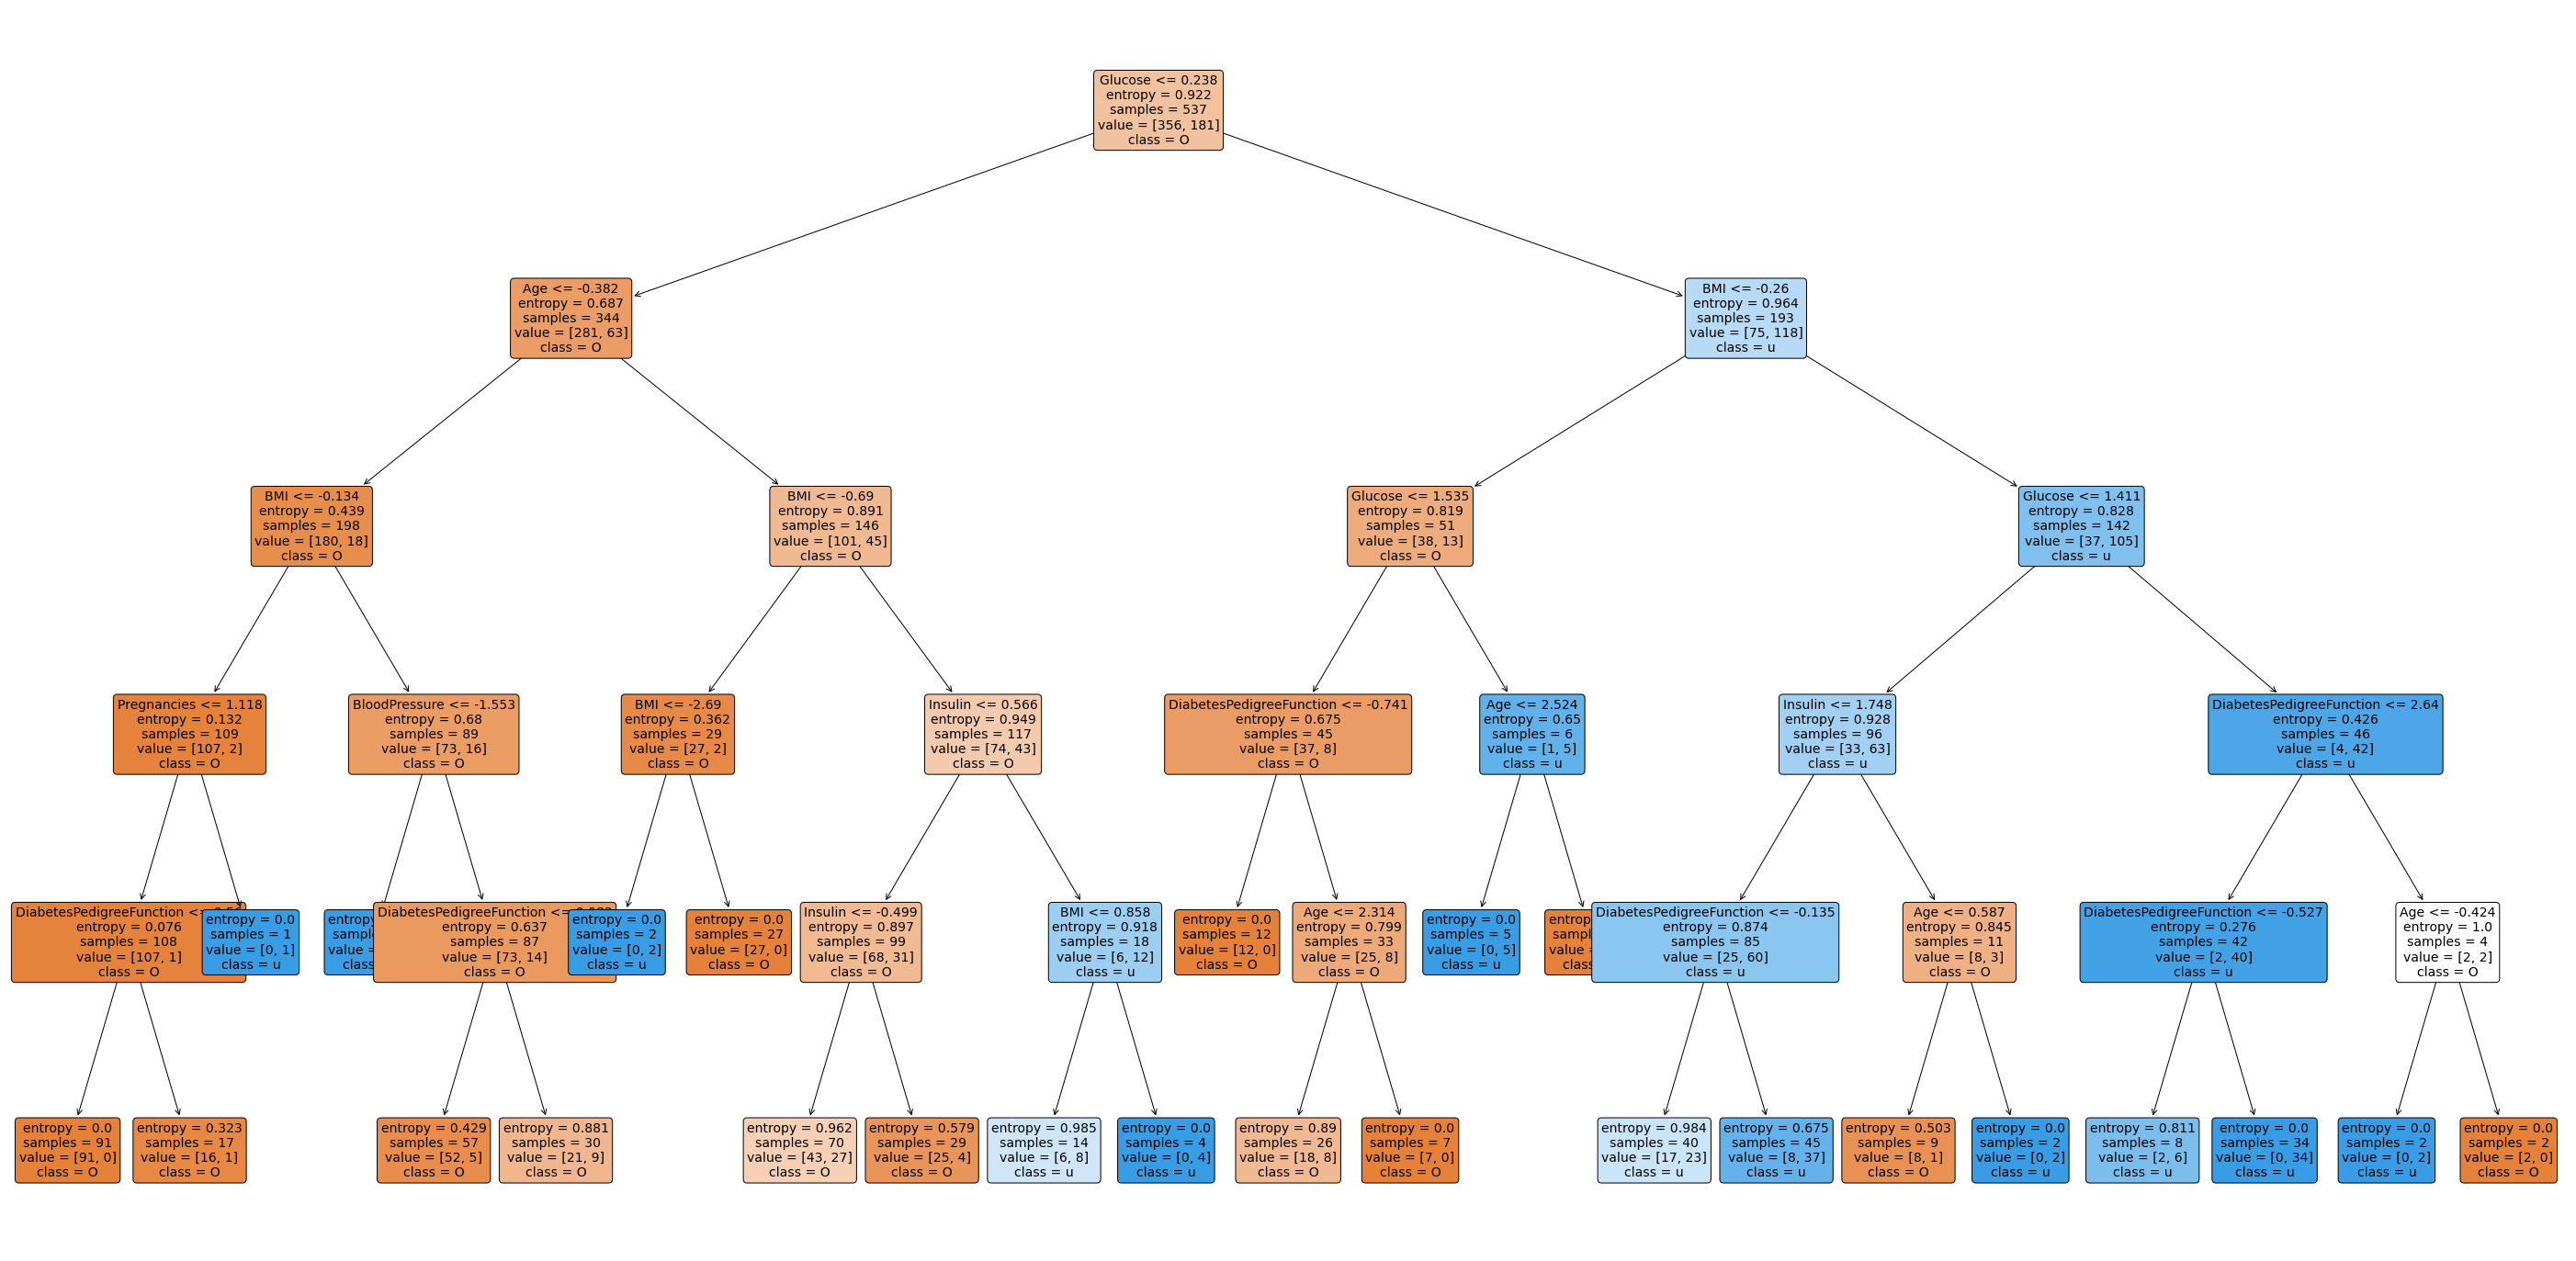

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25))
a = plot_tree(clf, 
              feature_names=Data.iloc[:,:8].columns, 
              class_names='Outcome', 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [18]:
print(clf.score(X_train,Y_train))
clf.score(X_test,Y_test)

0.8361266294227188


0.7359307359307359

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       144
           1       0.67      0.59      0.63        87

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.73      0.74      0.73       231



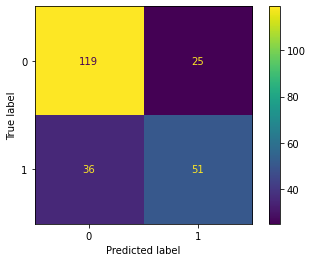

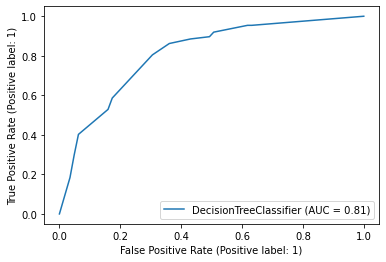

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(Y_test,clf.predict(X_test)))
plot_confusion_matrix(clf,X_test, Y_test)
plot_roc_curve(clf,X_test, Y_test)
plt.show()

# Conclusion 
-----
In this case the AUC of DecisionTree is 0.81, not very high but I think it's acceptable.The Higher value of AUC  the more efficiently our binary classifier distinguish between two different classes.

 